<a href="https://colab.research.google.com/github/Kalpana2709/Titanic-logistic-deployment/blob/main/LOGISTIC_REGRESSION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import joblib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [4]:
# Step 2: Load the datasets
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Step 3: Exploratory Data Analysis (EDA)
print(train_df.info())
print(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

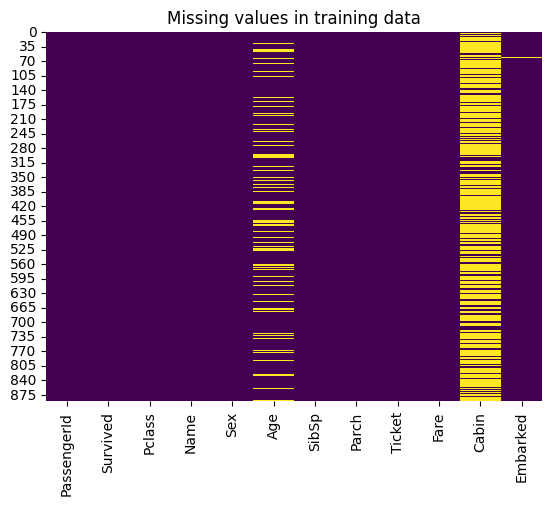

In [6]:
# Missing value heatmap
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing values in training data")
plt.show()

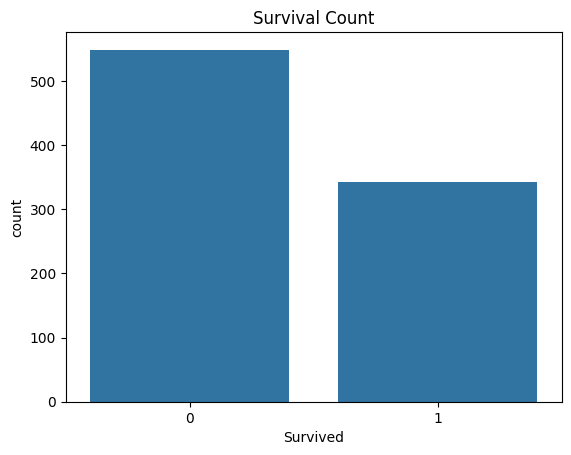

In [7]:
# Target variable distribution
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()

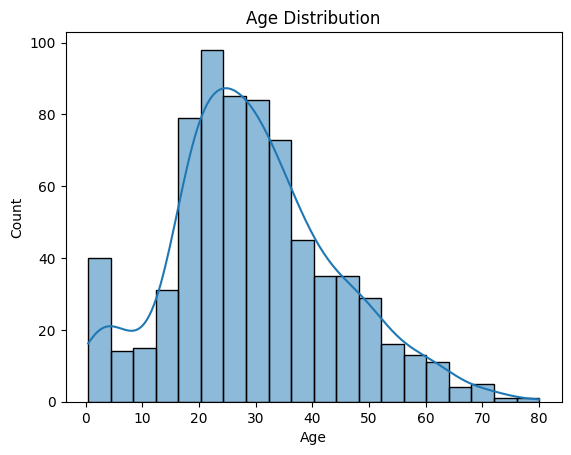

In [8]:
# Age distribution
sns.histplot(train_df['Age'].dropna(), kde=True)
plt.title("Age Distribution")
plt.show()

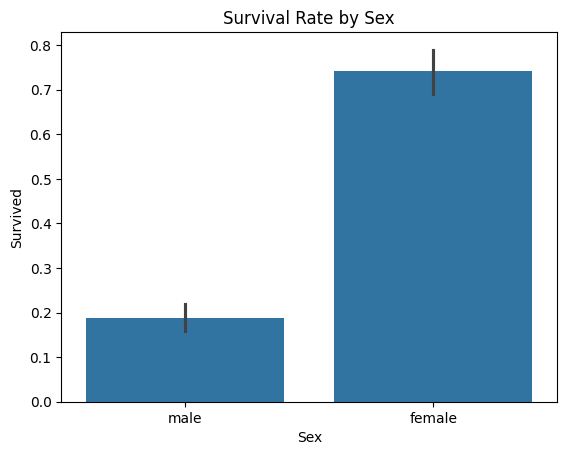

In [9]:
# Survival by Sex
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title("Survival Rate by Sex")
plt.show()

In [10]:
# Step 4: Data Preprocessing

# Fill missing values
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

# Drop irrelevant columns
cols_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

# Manual encoding
sex_map = {'male': 1, 'female': 0}
embarked_map = {'C': 0, 'Q': 1, 'S': 2}

train_df['Sex'] = train_df['Sex'].map(sex_map)
test_df['Sex'] = test_df['Sex'].map(sex_map)

train_df['Embarked'] = train_df['Embarked'].map(embarked_map)
test_df['Embarked'] = test_df['Embarked'].map(embarked_map)

In [11]:
# Step 5: Model Training

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Step 6: Evaluation

y_pred = model.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall:", recall_score(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred))

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888


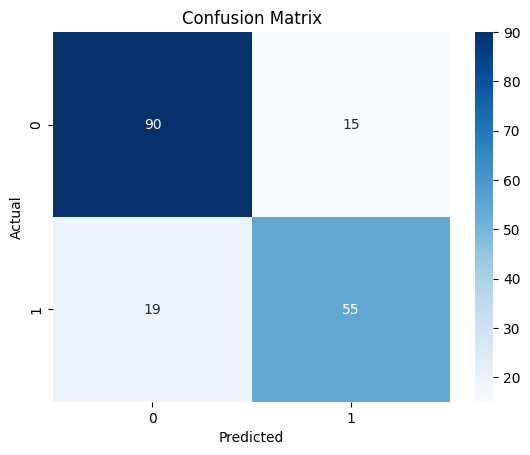

In [13]:
# Confusion matrix
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


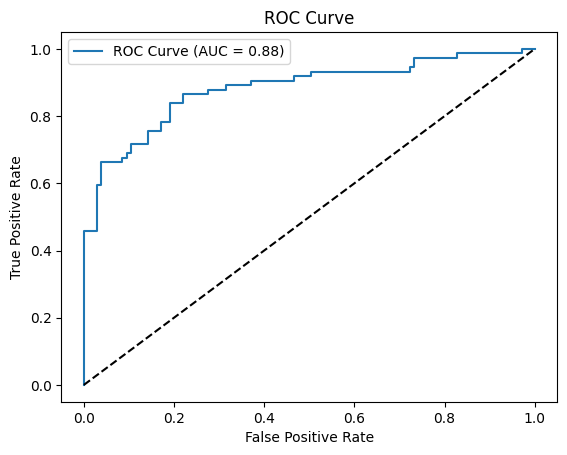

In [14]:
# ROC Curve
y_proba = model.predict_proba(X_val)[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = roc_auc_score(y_val, y_proba)

plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [15]:
# Step 7: Interpretation
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})
coefficients.sort_values(by='Coefficient', ascending=False)

,Feature,Coefficient
5,Fare,0.002499
2,Age,-0.031150
4,Parch,-0.115943
6,Embarked,-0.223513
3,SibSp,-0.295562
0,Pclass,-0.931850
1,Sex,-2.597233


In [16]:
# Step 8: Save the model for Streamlit deployment
joblib.dump(model, "logistic_model.pkl")
print("Model saved as logistic_model.pkl")

Model saved as logistic_model.pkl


In [17]:
# Step 9: Generate Streamlit app code
app_code = '''
import streamlit as st
import pandas as pd
import joblib

model = joblib.load('logistic_model.pkl')

st.title("Titanic Survival Predictor")

pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.selectbox("Sex", ["male", "female"])
age = st.slider("Age", 0, 100, 30)
sibsp = st.number_input("Siblings/Spouses Aboard", 0)
parch = st.number_input("Parents/Children Aboard", 0)
fare = st.number_input("Fare", 0.0)
embarked = st.selectbox("Embarked", ["C", "Q", "S"])

sex = 1 if sex == "male" else 0
embarked_map = {"C": 0, "Q": 1, "S": 2}
embarked = embarked_map[embarked]

input_data = pd.DataFrame([[pclass, sex, age, sibsp, parch, fare, embarked]],
                          columns=["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"])

if st.button("Predict"):
    prediction = model.predict(input_data)
    result = "Survived" if prediction[0] == 1 else "Did Not Survive"
    st.subheader(f"Prediction: {result}")
'''

# Save app code to a file
with open("app.py", "w") as f:
    f.write(app_code)

print("Streamlit app generated as app.py")

Streamlit app generated as app.py


In [24]:
## Deployment

# The logistic regression model was successfully deployed online using Streamlit Community Cloud.

#Deployed App: (https://titanic-logistic-deployment-cb6wk6teqbjyiyneyidj74.streamlit.app/)

## ** Project Summary:**

This notebook implements a Logistic Regression model to predict Titanic passenger survival, including:

- Data cleaning and encoding
- Exploratory Data Analysis (EDA)
- Model training and evaluation
- Confusion matrix and ROC-AUC analysis
- Streamlit app generation and online deployment

###  **Deployed App:**
https://titanic-logistic-deployment-cb6wk6teqbjyiyneyidj74.streamlit.app/()

### **GitHub Repo**:
(https://github.com/Kalpana2709/Titanic-logistic-deployment)

## ** Interview Questions**

### 1. What is the difference between precision and recall?

- **Precision** measures the accuracy of the positive predictions.  
  It answers: *Of all the instances predicted as positive, how many were actually positive?*

  \[
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}}
  \]

- **Recall** (also known as sensitivity or true positive rate) measures how well the model captures actual positives.  
  It answers: *Of all the actual positive instances, how many were correctly predicted?*

  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}
  \]

- **Analogy**:
  - Precision is important when **false positives** are costly (e.g., spam email filter).
  - Recall is important when **false negatives** are costly (e.g., cancer detection).

---

### 2. What is cross-validation, and why is it important in binary classification?

**Cross-validation** is a technique used to evaluate the generalization performance of a machine learning model.  
It involves splitting the dataset into **k folds** (subsets), training the model on `k-1` folds and validating it on the remaining fold. This is repeated `k` times, and the average performance is used as the final metric.

- **Why it's important**:
  - Prevents overfitting to a single train/test split.
  - Gives a more reliable estimate of how the model performs on unseen data.
  - Helps in hyperparameter tuning and model comparison.

**Common type**:  
- **k-Fold Cross-Validation**: Typically with `k=5` or `k=10`.

---